In [45]:
""" Author : Changhyun Kim 
    Starting date : 05/06/2022
"""

import numpy as np
import pandas as pd
import random 
import tensorflow as tf 
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

In [46]:
musicdb = pd.read_csv(
    'src/genres_v2.csv', usecols=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'tempo', 'song_name'], low_memory=False)

In [47]:
# Drop na value
musicDB = musicdb.dropna()

In [48]:
musicDB_columns = musicDB.columns

# devide dataset into predictors and target 
predictors = musicDB[musicDB_columns[musicDB_columns != 'song_name']]
target = musicDB['song_name']

#rand_number = random.randrange(0,21519)

In [49]:
train_db = musicDB.sample(frac=0.8, random_state=0)
test_db = musicDB.drop(train_db.index)

train_x = train_db.copy()
test_x = test_db.copy()

train_y = train_db.pop('danceability')
test_y = test_db.pop('danceability')

# X_data = musicDB[['tempo','loudness']].transpose()
# Y_data = musicDB[['danceability']].transpose()

In [50]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [51]:
multi_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [52]:
train_v = train_x.drop(['song_name',
                       'danceability'],axis=1)
train_v.head()
#train_v.head()
multi_model.predict(train_v[:10])

1/1 [==============================] - 0s 53ms/step


2022-06-17 20:37:36.820445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[-39.17738 ],
       [-29.92002 ],
       [-25.717997],
       [-34.1481  ],
       [-34.520115],
       [-34.716934],
       [-27.765665],
       [-30.650312],
       [-40.90141 ],
       [-39.85673 ]], dtype=float32)

In [53]:
multi_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(6, 1) dtype=float32, numpy=
array([[-0.34849173],
       [ 0.60426664],
       [ 0.34245265],
       [-0.91339725],
       [ 0.53233755],
       [-0.20247483]], dtype=float32)>

In [54]:
multi_model.compile(
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
loss = 'mean_absolute_error')
train_y.head()

13403    0.348
14474    0.555
11061    0.631
19802    0.599
5797     0.690
Name: danceability, dtype: float64

In [55]:
trainning = multi_model.fit(
train_v,
train_y,
epochs=100,
verbose=2,
validation_split = 0.2)

Epoch 1/100


2022-06-17 20:37:56.127131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-17 20:37:57.472298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


431/431 - 2s - loss: 2.0199 - val_loss: 0.8455 - 2s/epoch - 4ms/step
Epoch 2/100
431/431 - 1s - loss: 1.1321 - val_loss: 1.2544 - 1s/epoch - 3ms/step
Epoch 3/100
431/431 - 2s - loss: 1.4068 - val_loss: 0.2819 - 2s/epoch - 3ms/step
Epoch 4/100
431/431 - 1s - loss: 1.6100 - val_loss: 0.2689 - 1s/epoch - 3ms/step
Epoch 5/100
431/431 - 1s - loss: 1.3932 - val_loss: 1.3058 - 1s/epoch - 3ms/step
Epoch 6/100
431/431 - 1s - loss: 1.9585 - val_loss: 1.6245 - 1s/epoch - 3ms/step
Epoch 7/100
431/431 - 1s - loss: 1.4350 - val_loss: 0.7752 - 1s/epoch - 3ms/step
Epoch 8/100
431/431 - 1s - loss: 1.2379 - val_loss: 0.1295 - 1s/epoch - 3ms/step
Epoch 9/100
431/431 - 1s - loss: 1.6038 - val_loss: 0.2036 - 1s/epoch - 3ms/step
Epoch 10/100
431/431 - 1s - loss: 1.5990 - val_loss: 1.1667 - 1s/epoch - 3ms/step
Epoch 11/100
431/431 - 1s - loss: 1.4409 - val_loss: 0.5540 - 1s/epoch - 3ms/step
Epoch 12/100
431/431 - 1s - loss: 1.9990 - val_loss: 0.8387 - 1s/epoch - 3ms/step
Epoch 13/100
431/431 - 1s - loss: 1.7

In [56]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [loudness]')
    plt.legend()
    plt.grid(True)

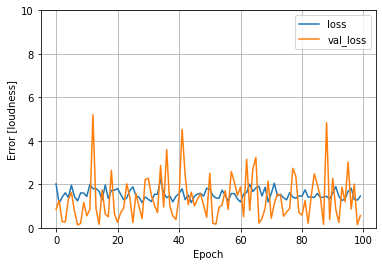

In [57]:
plot_loss(trainning)

In [58]:
test_v = test_x.drop(['song_name'],axis=1)

In [59]:
test_v.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo
10,0.864,0.365,-10.219,0.0655,0.1870,0.000000,189.938
13,0.767,0.576,-9.683,0.2560,0.1450,0.000003,139.990
19,0.849,0.648,-6.188,0.0832,0.0725,0.005920,212.150
28,0.799,0.966,-4.586,0.3660,0.0890,0.000000,139.967
40,0.650,0.952,-2.686,0.5000,0.0912,0.351000,209.998


In [60]:
test_v.loc[10]

danceability          0.8640
energy                0.3650
loudness            -10.2190
speechiness           0.0655
acousticness          0.1870
instrumentalness      0.0000
tempo               189.9380
Name: 10, dtype: float64

In [62]:
multi_model.predict(test_v.loc[13])

1/1 [==============================] - 0s 13ms/step


array([[ 1.0814184 ],
       [ 1.066182  ],
       [ 0.24780375],
       [ 1.0406551 ],
       [ 1.0318004 ],
       [ 1.0202338 ],
       [12.187479  ]], dtype=float32)

In [63]:
multi_model.save('multi_danceability')

INFO:tensorflow:Assets written to: multi_danceability/assets
